<a href="https://colab.research.google.com/github/MYon003/Myon/blob/main/Projects/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [3]:
# Getting the directories of the data

import os

train_dataset_dir = '/content/seg_train/seg_train'
test_dataset_dir = '/content/seg_test/seg_test'

In [16]:
# Processing the data

from keras.preprocessing.image import ImageDataGenerator

# Images will be rescaled by 1./255 the train_datagen will have
# a validation split because the train data does not bring it's own
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(batch_size = 30,
                                               directory = train_dataset_dir,
                                               target_size = (150,150),
                                               # Get train data "train subset"
                                               subset="training",
                                               class_mode = 'categorical')

validation_data = train_datagen.flow_from_directory(batch_size = 30,
                                               directory = train_dataset_dir,
                                               target_size = (150,150),
                                               # Get train data "Valid subset"
                                               subset="validation",
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(batch_size = 30,
                                               directory = test_dataset_dir,
                                               target_size = (150,150),
                                               class_mode = 'categorical')

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [26]:
# Creating the model and compiling it (1st attempt)
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 128)     

In [27]:
# Fitting the model and keeping to history of it to plot it later.

history = model.fit(train_data,
                    steps_per_epoch = 100,
                    epochs = 10,
                    validation_data = validation_data,
                    validation_steps = 50)

Epoch 1/10
100/100 [==============================] - 170s 2s/step - loss: 1.5795 - accuracy: 0.3880 - val_loss: 1.1073 - val_accuracy: 0.5647
Epoch 2/10
100/100 [==============================] - 167s 2s/step - loss: 1.1343 - accuracy: 0.5584 - val_loss: 1.0137 - val_accuracy: 0.6100
Epoch 3/10
100/100 [==============================] - 169s 2s/step - loss: 1.0092 - accuracy: 0.6252 - val_loss: 0.8889 - val_accuracy: 0.6527
Epoch 4/10
100/100 [==============================] - 169s 2s/step - loss: 0.9102 - accuracy: 0.6507 - val_loss: 0.8306 - val_accuracy: 0.6667
Epoch 5/10
100/100 [==============================] - 168s 2s/step - loss: 0.8546 - accuracy: 0.6690 - val_loss: 0.7573 - val_accuracy: 0.7393
Epoch 6/10
100/100 [==============================] - 168s 2s/step - loss: 0.8011 - accuracy: 0.7090 - val_loss: 1.1327 - val_accuracy: 0.6340
Epoch 7/10
100/100 [==============================] - 168s 2s/step - loss: 0.7480 - accuracy: 0.7197 - val_loss: 0.7540 - val_accuracy: 0.7087

In [28]:
# Testing the accuracy
test_loss, test_acc = model.evaluate(test_data)
print('test_acc:', test_acc)

100/100 [==============================] - 52s 520ms/step - loss: 0.6715 - accuracy: 0.7423
test_acc: 0.7423333525657654


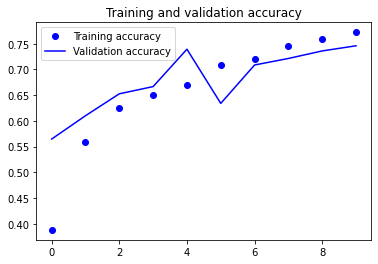

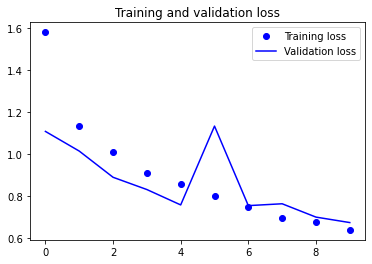

In [31]:
# Plotting the accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
# Creating the model and compiling it (2nd attempt)
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.summary()

# Testing with a different optimizer to see if there is a difference
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr=1e-4),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 128)     

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [34]:
# Fitting the model and keeping to history of it to plot it later.

history = model.fit(train_data,
                    steps_per_epoch = 100,
                    # Adding more epochs to test for a difference
                    epochs = 15,
                    validation_data = validation_data,
                    validation_steps = 50)

Epoch 1/15
100/100 [==============================] - 178s 2s/step - loss: 1.4297 - accuracy: 0.4257 - val_loss: 1.1717 - val_accuracy: 0.5507
Epoch 2/15
100/100 [==============================] - 173s 2s/step - loss: 1.1762 - accuracy: 0.5353 - val_loss: 1.0937 - val_accuracy: 0.5620
Epoch 3/15
100/100 [==============================] - 173s 2s/step - loss: 1.0986 - accuracy: 0.5817 - val_loss: 1.0799 - val_accuracy: 0.5727
Epoch 4/15
100/100 [==============================] - 173s 2s/step - loss: 1.0006 - accuracy: 0.6170 - val_loss: 0.9482 - val_accuracy: 0.6393
Epoch 5/15
100/100 [==============================] - 175s 2s/step - loss: 0.9834 - accuracy: 0.6203 - val_loss: 0.9252 - val_accuracy: 0.6513
Epoch 6/15
100/100 [==============================] - 173s 2s/step - loss: 0.9224 - accuracy: 0.6473 - val_loss: 0.9382 - val_accuracy: 0.6500
Epoch 7/15
100/100 [==============================] - 174s 2s/step - loss: 0.8696 - accuracy: 0.6727 - val_loss: 0.9374 - val_accuracy: 0.6480

In [35]:
# Testing the accuracy
test_loss, test_acc = model.evaluate(test_data)
print('test_acc:', test_acc)

100/100 [==============================] - 43s 429ms/step - loss: 0.6858 - accuracy: 0.7573
test_acc: 0.7573333382606506


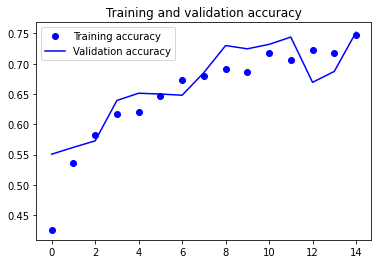

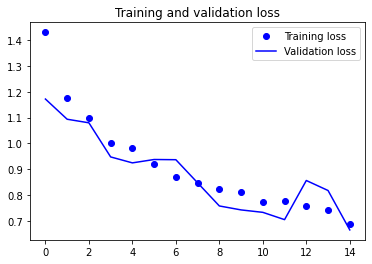

In [36]:
# Plotting the accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()